In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%cd /content/drive/MyDrive/TimeSeries
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

df=pd.read_csv("dataset/AMZN.csv")

print('Number of rows and columns:', df.shape)

df.head(5)

/content/drive/MyDrive/TimeSeries
Number of rows and columns: (1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-10,49.833500,49.897499,49.005001,49.360001,49.360001,61698000
1,2017-10-11,49.563499,49.775002,49.334999,49.750000,49.750000,46742000
2,2017-10-12,49.840500,50.422001,49.619999,50.046501,50.046501,81346000
3,2017-10-13,50.349998,50.388500,50.051498,50.146999,50.146999,48630000
4,2017-10-16,50.422001,50.478500,50.051998,50.317001,50.317001,40178000


In [29]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [30]:
# Feature Scaling 데이터 정규화

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(60, 800):

   X_train.append(training_set_scaled[i-60:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#(740, 60, 1)
X_train.shape

(740, 60, 1)

In [31]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [32]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 19ms/step - loss: 0.0411
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0083
Epoch 3/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0046
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 5/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0050
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0048
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 8/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 9/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0052
Epoch 10/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0046
Epoch 11/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0040
Epoch 12/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0037
Epoch 13/100
24/24 [=====

In [34]:
# Getting the predicted stock price of 2017

dataset_train = df.iloc[:800, 1:2]

dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 518):

   X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(458, 60, 1)


15/15 [==============================] - 0s 9ms/step


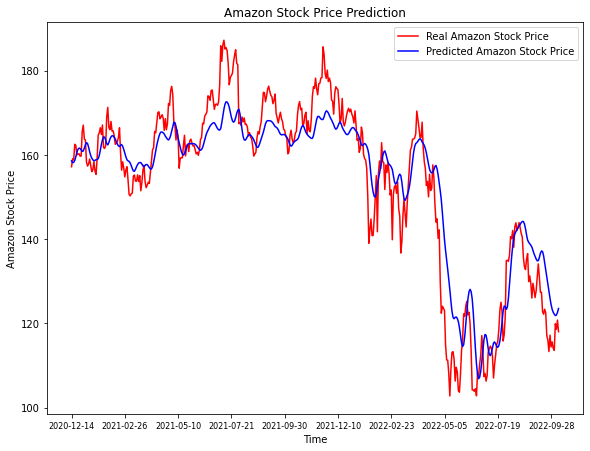

In [36]:
#테스트 세트를 사용하여 예측하기

predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#결과 시각화

# Visualising the results
plt.figure(figsize=(9.6,7.2))

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real Amazon Stock Price')

plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.xticks(np.arange(0,458,50), fontsize= 8)
plt.title('Amazon Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Amazon Stock Price')


plt.legend()

plt.show()

In [ ]:
%cd /content/drive/MyDrive/Sign/

import time
import numpy

training_data = []
seed = 10
numpy.random.seed(seed)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from keras.utils import to_categorical

time_periods = 20       # 한 동영상의 frame 수
number_sensors = 84     # 한 frame의 keypoint 개수
input_shape = (time_periods * number_sensors) #한 동영상의 keypoint 수

# Load CSV dataset with X (training data) and Y (label)
raw_dataset = numpy.loadtxt("/content/drive/MyDrive/Sign/CSV/HAND_ALL_OneRow.csv", delimiter = ",") # right_hand_dataset_reduced10.csv
# right_hand_dataset
X = raw_dataset[:, 0:1680]  # Get the first 84 numbers on the line (the coordinates)
y = raw_dataset[:, 1680]  # Get the labels
transformer = Normalizer().fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # Randomize Test/Train Splits

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

/content/drive/MyDrive/Sign
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


하나의 라벨은 42개의 keypoint * 20개의 frame

time step : 20
features : 42

In [ ]:
print(X_train.shape[0]) #2560
print(X_test.shape[0])

640
160


In [ ]:
'''X_train = X_train.reshape(64, 20, 84) #X_train.shape[0] = 1280, 2560/20
y_train = y_train.reshape(64, 20)
X_test = X_test.reshape(16, 20, 84) #X_test.shape[0] = 320, 320/20
y_test = y_test.reshape(16, 20)
'''


'X_train = X_train.reshape(64, 20, 84) #X_train.shape[0] = 1280, 2560/20\ny_train = y_train.reshape(64, 20)\nX_test = X_test.reshape(16, 20, 84) #X_test.shape[0] = 320, 320/20\ny_test = y_test.reshape(16, 20)\n'

In [ ]:
from keras.layers import Bidirectional, LSTM
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras import optimizers
#model.add(LSTM(20, input_shape=(20, 42)))

# All parameter gradients will be clipped to
# a maximum norm of 1.
#dam = optimizers.Adam(lr=0.000001)

K.clear_session()
model = Sequential() # Sequeatial Model

model.add(Reshape((time_periods, number_sensors), input_shape=(input_shape,)))
model.add(Bidirectional(LSTM(20, return_sequences=True))) # (timestep, feature)
model.add(Bidirectional(LSTM(20, return_sequences=True))) # (timestep, feature)
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 20, 84)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 40)           16800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20, 40)           9760      
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               205056    
                                                                 
 dropout (Dropout)           (None, 256)               0

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
40/40 [==============================] - 7s 24ms/step - loss: 0.0899 - accuracy: 0.1312
Epoch 2/100
40/40 [==============================] - 1s 24ms/step - loss: 0.0874 - accuracy: 0.1578
Epoch 3/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0838 - accuracy: 0.2234
Epoch 4/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0779 - accuracy: 0.3000
Epoch 5/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0690 - accuracy: 0.4344
Epoch 6/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0588 - accuracy: 0.5141
Epoch 7/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0528 - accuracy: 0.6016
Epoch 8/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0506 - accuracy: 0.5984
Epoch 9/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0438 - accuracy: 0.6734
Epoch 10/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0443 - accuracy: 0.6547

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=16, verbose = 0)
print("Score: ", loss_and_metrics)

5/5 [==============================] - 2s 12ms/step - loss: 0.0282 - accuracy: 0.8188
Score:  [0.028233671560883522, 0.8187500238418579]


In [ ]:
test_loss

0.028233671560883522

In [ ]:
test_acc

0.8187500238418579

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
predicted = y_pred.argmax(axis=-1)
y_labels= y_test.argmax(axis= -1)
#y_pred_labels=np.argmax(y_pred, axis= 1)
#print(y_labels)
print(y_labels)
print(predicted)

5/5 [==============================] - 2s 15ms/step
[3 6 3 0 6 5 2 7 4 2 0 3 9 9 0 0 4 2 2 5 8 1 8 6 9 5 1 3 5 7 6 7 1 6 3 0 3
 7 8 9 7 9 9 7 5 5 5 5 1 8 8 7 3 0 9 7 3 2 9 9 8 0 7 7 1 2 3 1 3 2 5 8 0 4
 6 0 8 7 5 9 3 3 4 8 4 6 8 9 4 5 9 1 4 6 6 5 7 8 9 3 6 5 4 7 0 2 8 5 6 2 8
 0 8 9 8 7 5 0 2 2 5 2 0 5 0 5 3 7 5 5 7 5 0 9 9 1 2 8 9 9 5 4 9 4 3 5 3 0
 0 9 8 1 0 5 0 2 4 3 3 3]
[3 6 1 0 3 5 2 7 4 2 0 3 8 8 0 0 4 2 2 0 8 1 8 6 9 5 1 3 5 7 6 6 1 7 1 0 3
 0 9 9 6 9 9 7 5 5 5 5 1 8 8 6 3 0 8 6 1 2 9 8 8 0 6 7 1 2 0 1 3 2 5 8 0 4
 6 0 8 7 5 9 3 1 4 8 4 6 8 9 4 5 8 1 4 6 6 5 6 8 9 1 6 5 4 7 0 2 8 5 6 2 8
 0 8 9 8 6 5 0 2 2 5 2 5 5 0 5 3 7 5 5 6 5 0 9 9 1 2 8 9 9 5 4 8 4 3 5 3 6
 0 9 8 1 0 5 5 2 4 3 1 3]


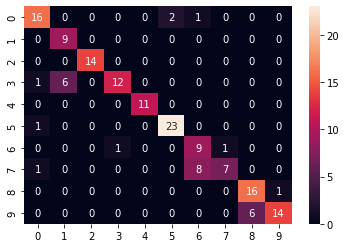

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_labels, predicted)

f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_labels, predicted)
print(cm)

[[16  0  0  0  0  2  1  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 1  6  0 12  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 1  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  1  0  0  9  1  0  0]
 [ 1  0  0  0  0  0  8  7  0  0]
 [ 0  0  0  0  0  0  0  0 16  1]
 [ 0  0  0  0  0  0  0  0  6 14]]


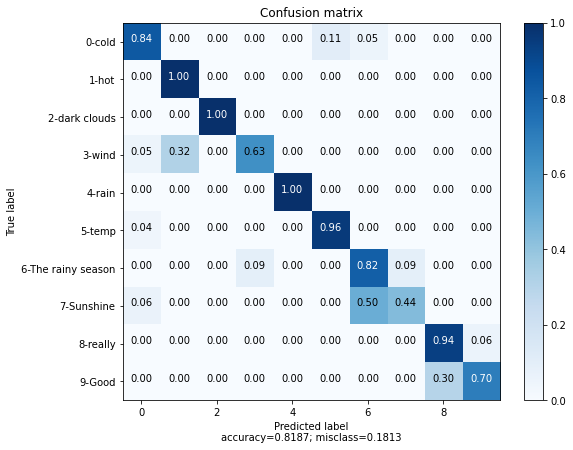

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import itertools
from itertools import product
import seaborn as sns

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    ticklabel=['0-cold','1-hot','2-dark clouds','3-wind','4-rain','5-temp','6-The rainy season','7-Sunshine','8-really','9-Good']

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels= ticklabel)
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, ticklabel)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

p= plot_confusion_matrix(cm)


  



In [ ]:
for i in range(160):
  if(y_labels[i] == predicted[i]):
    print('True : ', y_labels[i], 'Predict : ', predicted[i])
  else:
    print('Predict Failed!!!! True : ', y_labels[i], 'Predict : ', predicted[i])

True :  3 Predict :  3
True :  6 Predict :  6
True :  3 Predict :  3
True :  0 Predict :  0
True :  6 Predict :  6
True :  5 Predict :  5
True :  2 Predict :  2
True :  7 Predict :  7
True :  4 Predict :  4
True :  2 Predict :  2
True :  0 Predict :  0
True :  3 Predict :  3
Predict Failed!!!! True :  9 Predict :  8
True :  9 Predict :  9
True :  0 Predict :  0
True :  0 Predict :  0
True :  4 Predict :  4
True :  2 Predict :  2
True :  2 Predict :  2
Predict Failed!!!! True :  5 Predict :  6
True :  8 Predict :  8
True :  1 Predict :  1
True :  8 Predict :  8
True :  6 Predict :  6
True :  9 Predict :  9
True :  5 Predict :  5
True :  1 Predict :  1
True :  3 Predict :  3
True :  5 Predict :  5
True :  7 Predict :  7
True :  6 Predict :  6
Predict Failed!!!! True :  7 Predict :  6
True :  1 Predict :  1
Predict Failed!!!! True :  6 Predict :  7
True :  3 Predict :  3
True :  0 Predict :  0
True :  3 Predict :  3
True :  7 Predict :  7
True :  8 Predict :  8
True :  9 Predict :  9
Pred

In [ ]:
model.save("/content/drive/MyDrive/Sign/Model/BLSTM.h5")